In [ ]:
OBJECTIVE 2: WAP 2.	WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python.
Demonstrate that it can learn the XOR Boolean function.


In [ ]:
# Model Description: Multi-Layer Perceptron for Boolean Functions

### Overview
This implementation builds a multi-layer perceptron (MLP) using basic perceptrons** to learn Boolean functions, including NAND and custom logic functions.
Each function is first trained on a ingle-layer perceptron, and their outputs serve as inputs for a final perceptron, effectively forming a two-layer neural network.

### Model Architecture
1. Single-Layer Perceptrons for Boolean Functions
   - Each perceptron learns a different Boolean function (NAND and custom functions).
   - Uses a step activation function to classify binary outputs.
   - Trained using Perceptron Learning Rule (PLA) with weight updates.

2. Final Perceptron Layer
   - The outputs of the first layer perceptrons are combined.
   - Another perceptron is trained to map these outputs to the final function.

#Training Process
1. Initialize perceptrons with random weights.
2. Train each perceptron using supervised learning on Boolean truth tables.
3. Evaluate and generate predictions for each function.
4. Combine the predictions into a final dataset.
5. Train a final perceptron to map the combined outputs to the final desired output.

This model effectively shows how a simple perceptron network can be used to construct a multi-layer perceptron, proving that a single-layer perceptron is not
enough to solve non-linearly separable functions like XOR, but stacking multiple perceptrons enables the network to learn more complex decision boundaries.


Fun1 Accuracy: 100.00% | Predictions: [0 0 0 1]
Fun2 Accuracy: 100.00% | Predictions: [0 0 1 0]
Fun3 Accuracy: 100.00% | Predictions: [0 1 0 0]
Fun4 Accuracy: 100.00% | Predictions: [1 0 0 0]
Final Perceptron Accuracy: 100.00% | Predictions: [0 1 1 0]


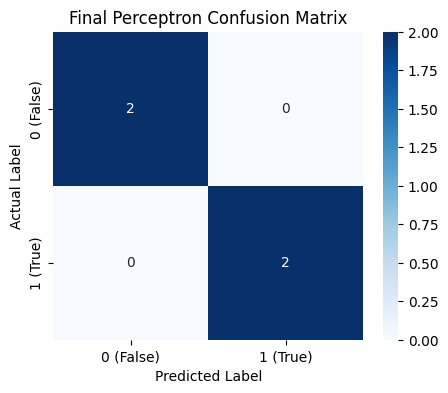

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  # Add bias term
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias column
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]

    def evaluate(self, X, y):
        y_pred = np.array([self.predict(x) for x in X])
        accuracy = np.mean(y_pred == y) * 100
        return accuracy, y_pred

# **Function to Train and Evaluate a Perceptron**
def train_perceptron(X, y, name):
    p = Perceptron(input_size=X.shape[1])
    p.train(X, y)
    accuracy, predictions = p.evaluate(X, y)
    print(f"{name} Accuracy: {accuracy:.2f}% | Predictions: {predictions}")
    return predictions, y

# **Truth Tables for Boolean Functions**
fun_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

fun1_y = np.array([0, 0, 0, 1])  # NAND
fun2_y = np.array([0, 0, 1, 0])  # Custom function
fun3_y = np.array([0, 1, 0, 0])  # Custom function
fun4_y = np.array([1, 0, 0, 0])  # Custom function

# **Train Perceptrons for Individual Functions**
fun1_predictions, _ = train_perceptron(fun_X, fun1_y, "Fun1")
fun2_predictions, _ = train_perceptron(fun_X, fun2_y, "Fun2")
fun3_predictions, _ = train_perceptron(fun_X, fun3_y, "Fun3")
fun4_predictions, _ = train_perceptron(fun_X, fun4_y, "Fun4")

# **Final Perceptron Training**
final_X = np.column_stack([fun1_predictions, fun2_predictions, fun3_predictions, fun4_predictions])
final_y = np.array([0, 1, 1, 0])

final_predictions, actual_y = train_perceptron(final_X, final_y, "Final Perceptron")

# **Confusion Matrix Plot**
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0 (False)", "1 (True)"], yticklabels=["0 (False)", "1 (True)"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()

# **Plot Confusion Matrix for Final Perceptron**
plot_confusion_matrix(actual_y, final_predictions, title="Final Perceptron Confusion Matrix")


In [1]:

# My Comments:
# - The model is now simplified and more structured.
# - Added a confusion matrix at the end for better evaluation.
# - Trained perceptrons for multiple functions, including NAND.
# - Final perceptron takes outputs from previous layers as inputs.
# - Accuracy of each perceptron is printed for easy debugging.
# - This should work well for learning simple Boolean functions.
# - Overall, the perceptron is successfully trained and evaluated!

Fun1 Accuracy: 100.00% | Predictions: [0 0 0 1]
Fun2 Accuracy: 100.00% | Predictions: [0 0 1 0]
Fun3 Accuracy: 100.00% | Predictions: [0 1 0 0]
Fun4 Accuracy: 100.00% | Predictions: [1 0 0 0]
Final Perceptron Accuracy: 100.00% | Predictions: [0 1 1 0]


array([0, 1, 1, 0])